# Prims Eager Version Code
 - First version of this code is written by my student Mahmoud Aljekhleb

In [4]:
#!pip install pqdict
import warnings
warnings.filterwarnings('ignore')

import networkx as nx
import matplotlib.pyplot as plt

from pqdict import pqdict # for an indexed priority queue (with key value pair) that allows updating values

### Edge Class
Edge stores 
 - the name of two nodes s, t
 - weight between two nodes
 - other(v) returns the node other than v
    

In [5]:
class edge():
    def __init__(self, s: str, t: str, weight:float):
        self.s = s
        self.t = t
        self.weight = weight
        
    def other(self, v):
        if self.s == v:
            return self.t
        return self.s
        
    def __str__(self):
        return "{} -({})- {}".format(self.s,self.weight,self.t)

   

### Node Class
 - Node stores list of edges

In [6]:
class node():
    def __init__(self, name: str):
        """
         - node has a name (str)
         - DIFFERENTLY neighbors is the list of edge objects
        """
        self.name = name
        self.neighbors = [] # list of edge objects !!
        
    def neighbors_name(self) -> list:
        """
        info about neighbors names (returns list of strings)
        """
        return [(e.t, e.weight) for e in self.neighbors]
      
     

### Weighted Undirected Graph

In [7]:
class weightedGraph():
    def __init__(self, elist: list):
        """
            self.nodes is a dictionary
                key   : node name
                value : node object
        """
        self.elist = elist
        self.node_names = list(set([s for s, t, w in elist] + [t for s,t,w in elist]))
        self.nodes = {s:node(s) for s in self.node_names}
        self.size = len(self.node_names) # how many nodes do we have
        self.create_graph()
      
    def add_edge(self, e:edge):
        """undirected Edge"""
        self.nodes[e.s].neighbors.append(e)
        self.nodes[e.t].neighbors.append(e)
    
    def create_graph(self):
        for s,t,w in self.elist:
            e = edge(s,t,w)
            self.add_edge(e)
                
    def info(self) -> dict:
        return {s:node_s.neighbors_name() for s,node_s in self.nodes.items()}
    
    def draw(self, color = 'orange', sp = [(0, 7), (1, 7), (0, 2)]):
        """
            Usage of networkx for visualisation
        """
        G = nx.Graph()
        G.add_weighted_edges_from(self.elist)
        plt.figure(figsize=(16,10))
       
        pos = nx.spring_layout(G)  # positions for all nodes
        nx.draw(G, pos, node_size=4000, node_color=color, font_size=50, with_labels=True)
        nx.draw_networkx_edge_labels(G, pos, font_size=30,  edge_labels = nx.get_edge_attributes(G,'weight'))
        
        nx.draw_networkx_edges(G, pos, edgelist=sp, width=10, edge_color='b')
        plt.show()


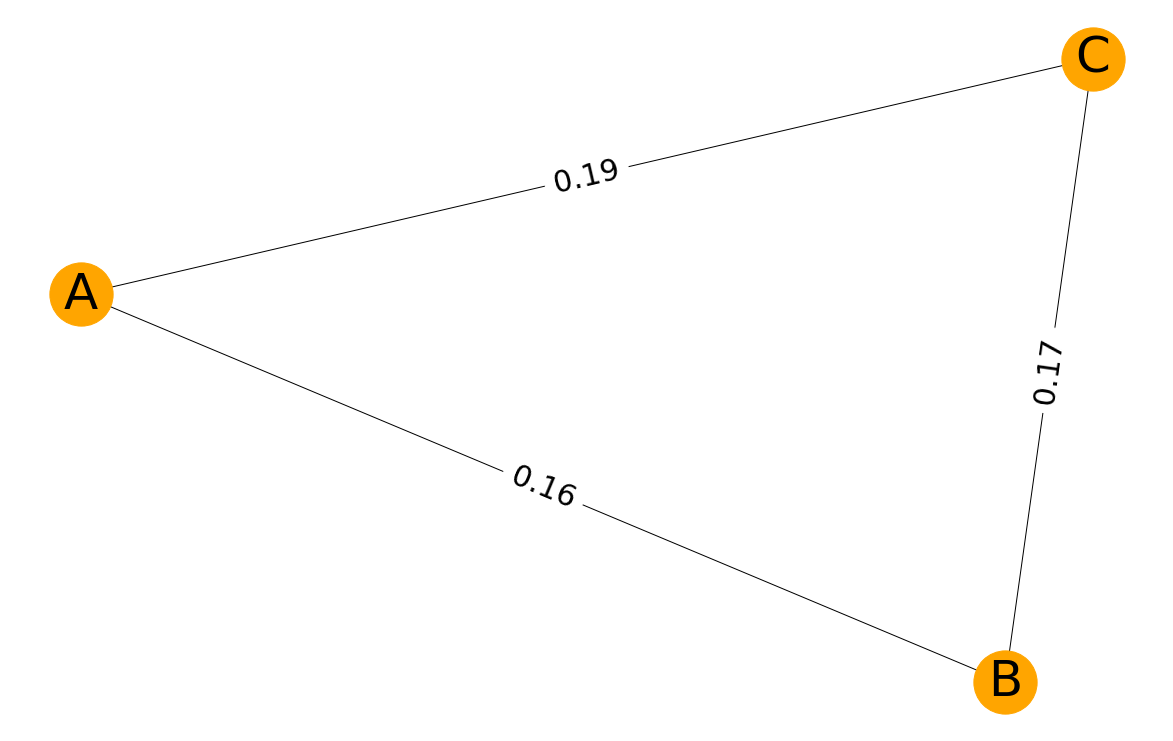

In [8]:
elist =[('A', 'B', 0.16),
        ('B', 'C', 0.17),
        ('A', 'C', 0.19)]
G = weightedGraph(elist)
G.draw(sp = [])

# Prim's Eager Algorithm

In [13]:
pq = pqdict()
pq.additem('a', 4)
pq.additem('b', 6)
pq.additem('c', 7)
pq

pqdict({'a': 4, 'b': 6, 'c': 7})

In [14]:
if 'c' in pq:
    pq.updateitem('c', 1)
pq

pqdict({'c': 1, 'b': 6, 'a': 4})

In [15]:
pq.popitem()

('c', 1)

In [16]:
pq

pqdict({'a': 4, 'b': 6})

In [17]:
class primMST():
    '''
    Finding the mst of a graph using Prim's algorithm with eager implementation
    '''
    def __init__(self, G:weightedGraph, s):
        
        self.G = G
        self.edgeTo = {n: None for n in G.node_names} # n: name of the node
        self.distTo = {n: float("inf") for n in G.node_names}
        # initially distance to every vertex is +inf, except source vertex s
        self.distTo[s] = 0
        
        
        self.pq = pqdict() # Indexed Priority Queue (Key: node name , Value: smallest distance)
        self.mst = [] # list for mst
        self.marked = {n: False for n in G.node_names} # 
        self.visit(s)
        
        while self.pq and len(self.mst) < G.size - 1:
            print('MST', [str(e) for e in self.mst])
            print('PQ', self.pq)
            print('\n')
            
            v, distance = self.pq.popitem() # pop a vertex
            self.mst.append(self.edgeTo[v]) # adding the edge of the minimum distance in pq
            self.visit(v) # visiting the added vertix to mst
            

                
    def visit(self, v):
        self.marked[v] = True # it is been added to mst
        for e in self.G.nodes[v].neighbors:
            t = e.other(v)

            if e.weight < self.distTo[t]:
                self.distTo[t] = e.weight
                self.edgeTo[t] = e
                
                if(t in self.pq): 
                    self.pq.updateitem(t, self.distTo[t])
                else:
                    self.pq.additem(t, self.distTo[t])

MST []
PQ pqdict({7: 0.16, 2: 0.26, 4: 0.38, 6: 0.58})


MST ['0 -(0.16)- 7']
PQ pqdict({1: 0.19, 2: 0.26, 4: 0.37, 6: 0.58, 5: 0.28})


MST ['0 -(0.16)- 7', '1 -(0.19)- 7']
PQ pqdict({2: 0.26, 5: 0.28, 4: 0.37, 6: 0.58, 3: 0.29})


MST ['0 -(0.16)- 7', '1 -(0.19)- 7', '0 -(0.26)- 2']
PQ pqdict({3: 0.17, 5: 0.28, 4: 0.37, 6: 0.4})


MST ['0 -(0.16)- 7', '1 -(0.19)- 7', '0 -(0.26)- 2', '2 -(0.17)- 3']
PQ pqdict({2: 0.17, 5: 0.28, 4: 0.37, 6: 0.4})


MST ['0 -(0.16)- 7', '1 -(0.19)- 7', '0 -(0.26)- 2', '2 -(0.17)- 3', '2 -(0.17)- 3']
PQ pqdict({5: 0.28, 6: 0.4, 4: 0.37})


MST ['0 -(0.16)- 7', '1 -(0.19)- 7', '0 -(0.26)- 2', '2 -(0.17)- 3', '2 -(0.17)- 3', '5 -(0.28)- 7']
PQ pqdict({4: 0.35, 6: 0.4})




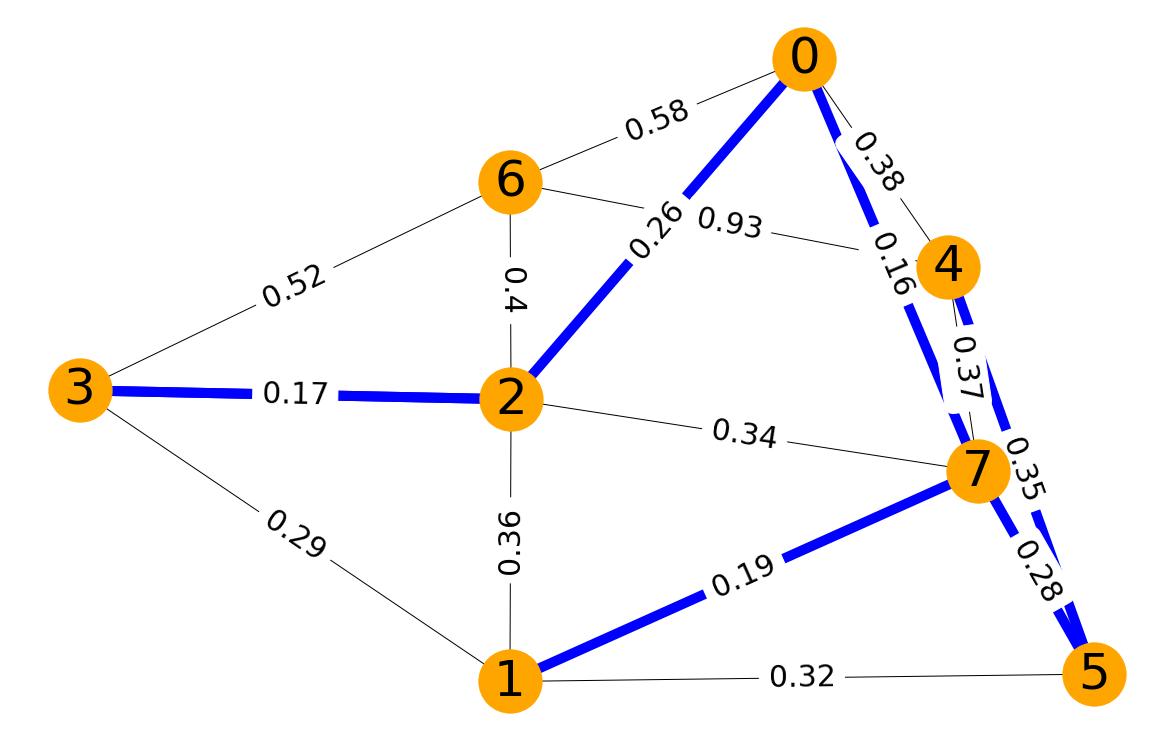

the mst is
[(0, 7), (1, 7), (0, 2), (2, 3), (2, 3), (5, 7), (4, 5)]
each node with the smallest edge connected to it
{0: 0, 1: 0.19, 2: 0.17, 3: 0.17, 4: 0.35, 5: 0.28, 6: 0.4, 7: 0.16}


In [18]:
elist =[(0, 7, 0.16),
        (2, 3, 0.17),
        (1, 7, 0.19),
        (0, 2, 0.26),
        (5, 7, 0.28),
        (1, 3, 0.29),
        (1, 5, 0.32),
        (2, 7, 0.34),
        (4, 5, 0.35),
        (1, 2, 0.36),
        (4, 7, 0.37),
        (0, 4, 0.38),
        (6, 2, 0.40),
        (3, 6, 0.52),
        (6, 0, 0.58),
        (6, 4, 0.93)]

G = weightedGraph(elist)

T = primMST(G,0)
G.draw(sp = [(e.s, e.t) for e in T.mst])

print('the mst is',[(e.s, e.t) for e in T.mst], sep = '\n')
print('each node with the smallest edge connected to it',T.distTo, sep = '\n')

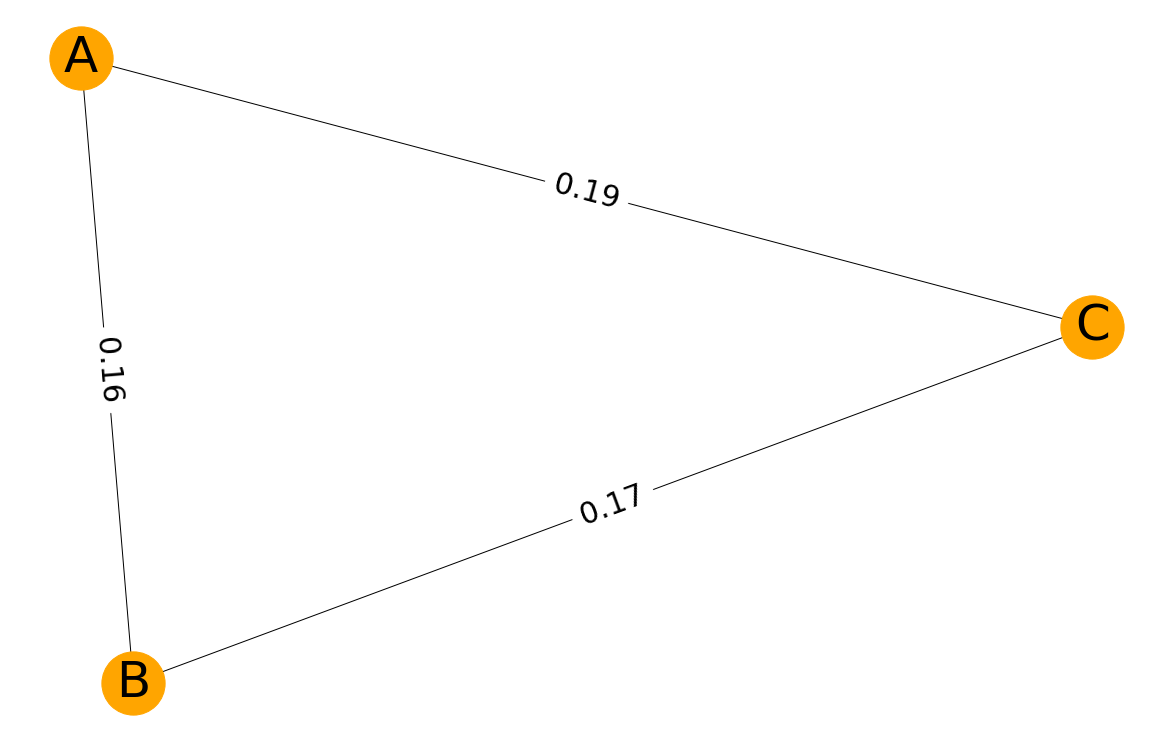

In [19]:
elist =[('A', 'B', 0.16),
        ('B', 'C', 0.17),
        ('A', 'C', 0.19)]
G = weightedGraph(elist)
G.draw(sp = [])

MST []
PQ pqdict({'B': 0.16, 'C': 0.19})


MST ['A -(0.16)- B']
PQ pqdict({'C': 0.17})




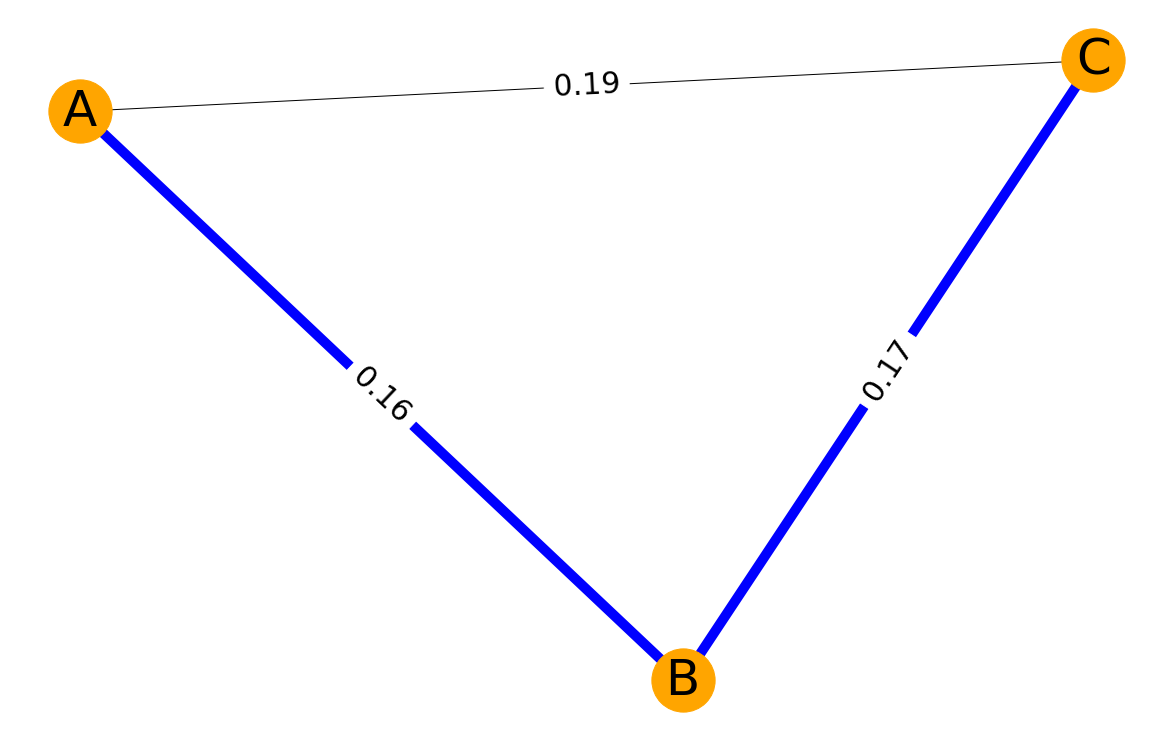

the mst is
[('A', 'B'), ('B', 'C')]
each node with the smallest edge connected to it
{'A': 0, 'B': 0.16, 'C': 0.17}


In [20]:
G = weightedGraph(elist)

T = primMST(G,'A')
G.draw(sp = [(e.s, e.t) for e in T.mst])

print('the mst is',[(e.s, e.t) for e in T.mst], sep = '\n')
print('each node with the smallest edge connected to it',T.distTo, sep = '\n')